In [1]:
import pandas as pd
import numpy as np
from upsetplot import plot
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import seaborn as sns
import gpplot as gpp
gpp.set_aesthetics(context = 'paper')

In [2]:
protein_coding_df_with_attributes = pd.read_csv('../../Data/GENCODE48/gencode_48_protein_coding_transcripts.csv')
protein_coding_df_with_attributes

,seqid,source,type,start,end,score,strand,phase,attributes,ID,...,level,ont,protein_id,tag,transcript_id,transcript_name,transcript_support_level,transcript_type,TSS,transcript_id_without_version
0,chr1,HAVANA,transcript,65419,71585,.,+,.,ID=ENST00000641515.2;Parent=ENSG00000186092.7;...,ENST00000641515.2,...,2,NaN,ENSP00000493376.2,"RNA_Seq_supported_partial,basic,Ensembl_canoni...",ENST00000641515.2,OR4F5-201,NaN,protein_coding,65419,ENST00000641515
1,chr1,HAVANA,transcript,450740,451678,.,-,.,ID=ENST00000426406.4;Parent=ENSG00000284733.2;...,ENST00000426406.4,...,2,NaN,ENSP00000409316.1,"basic,Ensembl_canonical,GENCODE_Primary,MANE_S...",ENST00000426406.4,OR4F29-201,NaN,protein_coding,451678,ENST00000426406
2,chr1,HAVANA,transcript,685716,686654,.,-,.,ID=ENST00000332831.5;Parent=ENSG00000284662.2;...,ENST00000332831.5,...,2,NaN,ENSP00000329982.2,"basic,Ensembl_canonical,GENCODE_Primary,MANE_S...",ENST00000332831.5,OR4F16-201,NaN,protein_coding,686654,ENST00000332831
3,chr1,HAVANA,transcript,923923,944574,.,+,.,ID=ENST00000616016.5;Parent=ENSG00000187634.13...,ENST00000616016.5,...,2,NaN,ENSP00000478421.2,"CAGE_supported_TSS,RNA_Seq_supported_partial,b...",ENST00000616016.5,SAMD11-209,5.0,protein_coding,923923,ENST00000616016
4,chr1,HAVANA,transcript,923923,944574,.,+,.,ID=ENST00000618323.5;Parent=ENSG00000187634.13...,ENST00000618323.5,...,2,NaN,ENSP00000480678.2,"CAGE_supported_TSS,basic,GENCODE_Primary,appri...",ENST00000618323.5,SAMD11-213,5.0,protein_coding,923923,ENST00000618323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171904,KI270731.1,ENSEMBL,transcript,10598,13001,.,-,.,ID=ENST00000619792.1;Parent=ENSG00000278633.1;...,ENST00000619792.1,...,3,NaN,ENSP00000484693.1,"basic,Ensembl_canonical,GENCODE_Primary",ENST00000619792.1,ENST00000619792,NaN,protein_coding,13001,ENST00000619792
171905,KI270734.1,ENSEMBL,transcript,72411,74814,.,+,.,ID=ENST00000617983.1;Parent=ENSG00000276017.1;...,ENST00000617983.1,...,3,NaN,ENSP00000481613.1,"basic,Ensembl_canonical,GENCODE_Primary",ENST00000617983.1,ENST00000617983,NaN,protein_coding,72411,ENST00000617983
171906,KI270734.1,ENSEMBL,transcript,131494,137392,.,+,.,ID=ENST00000613204.1;Parent=ENSG00000278817.1;...,ENST00000613204.1,...,3,NaN,ENSP00000482514.1,"basic,Ensembl_canonical,GENCODE_Primary",ENST00000613204.1,ENST00000613204,1.0,protein_coding,131494,ENST00000613204
171907,KI270734.1,ENSEMBL,transcript,138082,161750,.,-,.,ID=ENST00000615165.1;Parent=ENSG00000277196.4;...,ENST00000615165.1,...,3,NaN,ENSP00000482462.1,basic,ENST00000615165.1,ENST00000615165,1.0,protein_coding,161750,ENST00000615165


In [25]:
protein_coding_df_with_attributes[protein_coding_df_with_attributes['gene_name'].isin(['H2AC1','H2BC1'])][['gene_name','TSS','strand']]

,gene_name,TSS,strand
53801,H2AC1,25726560,-
53802,H2AC1,25726562,-
53803,H2BC1,25726777,+


In [3]:
protein_coding_df_with_attributes.seqid.value_counts()

chr1          15881
chr2          12026
chr19         11496
chr11         11298
chr17         11281
chr3          10842
chr12         10047
chr16          8610
chr7           7945
chr5           7737
chr6           7502
chr4           6581
chr8           6332
chr14          6227
chr10          6006
chr9           5893
chr15          5825
chrX           5692
chr20          3820
chr22          3670
chr18          2800
chr13          2398
chr21          1644
chrY            314
chrM             13
KI270728.1        5
KI270727.1        4
KI270734.1        4
GL000213.1        2
KI270711.1        2
KI270713.1        2
KI270726.1        2
GL000194.1        2
GL000195.1        1
GL000219.1        1
KI270721.1        1
GL000009.2        1
KI270731.1        1
GL000218.1        1
Name: seqid, dtype: int64

In [4]:
#remove unlocalized contigs and chrM
chromosomes = np.linspace(1,22,22).astype(np.int64).astype(str).tolist() + ['X','Y']
chromosomes = ['chr'+chrom for chrom in chromosomes]
protein_coding_df_with_attributes.seqid= protein_coding_df_with_attributes.seqid.astype(str)
protein_coding_df_with_attributes = protein_coding_df_with_attributes[protein_coding_df_with_attributes.seqid.isin(chromosomes)].copy()
protein_coding_df_with_attributes

,seqid,source,type,start,end,score,strand,phase,attributes,ID,...,level,ont,protein_id,tag,transcript_id,transcript_name,transcript_support_level,transcript_type,TSS,transcript_id_without_version
0,chr1,HAVANA,transcript,65419,71585,.,+,.,ID=ENST00000641515.2;Parent=ENSG00000186092.7;...,ENST00000641515.2,...,2,NaN,ENSP00000493376.2,"RNA_Seq_supported_partial,basic,Ensembl_canoni...",ENST00000641515.2,OR4F5-201,NaN,protein_coding,65419,ENST00000641515
1,chr1,HAVANA,transcript,450740,451678,.,-,.,ID=ENST00000426406.4;Parent=ENSG00000284733.2;...,ENST00000426406.4,...,2,NaN,ENSP00000409316.1,"basic,Ensembl_canonical,GENCODE_Primary,MANE_S...",ENST00000426406.4,OR4F29-201,NaN,protein_coding,451678,ENST00000426406
2,chr1,HAVANA,transcript,685716,686654,.,-,.,ID=ENST00000332831.5;Parent=ENSG00000284662.2;...,ENST00000332831.5,...,2,NaN,ENSP00000329982.2,"basic,Ensembl_canonical,GENCODE_Primary,MANE_S...",ENST00000332831.5,OR4F16-201,NaN,protein_coding,686654,ENST00000332831
3,chr1,HAVANA,transcript,923923,944574,.,+,.,ID=ENST00000616016.5;Parent=ENSG00000187634.13...,ENST00000616016.5,...,2,NaN,ENSP00000478421.2,"CAGE_supported_TSS,RNA_Seq_supported_partial,b...",ENST00000616016.5,SAMD11-209,5.0,protein_coding,923923,ENST00000616016
4,chr1,HAVANA,transcript,923923,944574,.,+,.,ID=ENST00000618323.5;Parent=ENSG00000187634.13...,ENST00000618323.5,...,2,NaN,ENSP00000480678.2,"CAGE_supported_TSS,basic,GENCODE_Primary,appri...",ENST00000618323.5,SAMD11-213,5.0,protein_coding,923923,ENST00000618323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171862,chrY,HAVANA,transcript,57208519,57212183,.,+,.,ID=ENST00000711281.1;Parent=ENSG00000292372.1;...,ENST00000711281.1,...,2,NaN,NaN,no_tags,ENST00000711281.1,WASH6P-226,5.0,retained_intron,57208519,ENST00000711281
171863,chrY,HAVANA,transcript,57209306,57210051,.,+,.,ID=ENST00000711282.1;Parent=ENSG00000292372.1;...,ENST00000711282.1,...,2,NaN,NaN,no_tags,ENST00000711282.1,WASH6P-227,1.0,retained_intron,57209306,ENST00000711282
171864,chrY,HAVANA,transcript,57209887,57212186,.,+,.,ID=ENST00000711283.1;Parent=ENSG00000292372.1;...,ENST00000711283.1,...,2,NaN,NaN,no_tags,ENST00000711283.1,WASH6P-228,2.0,retained_intron,57209887,ENST00000711283
171865,chrY,HAVANA,transcript,57210344,57212074,.,+,.,ID=ENST00000711284.1;Parent=ENSG00000292372.1;...,ENST00000711284.1,...,2,NaN,NaN,no_tags,ENST00000711284.1,WASH6P-229,1.0,retained_intron,57210344,ENST00000711284


In [5]:
protein_coding_df_with_attributes.transcript_type.value_counts()

protein_coding                    89830
retained_intron                   33356
protein_coding_CDS_not_defined    26551
nonsense_mediated_decay           21902
non_stop_decay                      105
protein_coding_LoF                   75
TEC                                  48
Name: transcript_type, dtype: int64

In [6]:
#look at all potential tags that could be investigated
protein_coding_df_with_attributes.tag.str.split(',').explode().drop_duplicates().dropna()

0                  RNA_Seq_supported_partial
0                                      basic
0                          Ensembl_canonical
0                            GENCODE_Primary
0                                MANE_Select
                        ...                 
11088           3_nested_supported_extension
13725                   low_sequence_quality
22081                            bicistronic
29120           5_nested_supported_extension
90249    non_canonical_genome_sequence_error
Name: tag, Length: 61, dtype: object

In [7]:
#create list of tags of interest
tags_of_interest = ['basic', 'GENCODE_Primary', 'MANE_Select', 'Ensembl_canonical']
tag_rename_dict = {'basic':'GENCODE Basic',
                   'GENCODE_Primary': 'GENCODE Primary',
                   'MANE_Select':'MANE Select',
                   'Ensembl_canonical':'Ensembl Canonical'}

In [8]:
#create a separate column for each tag indicating whether that transcript is in that transcript set
for tag in tags_of_interest:
    protein_coding_df_with_attributes[tag_rename_dict[tag]] = protein_coding_df_with_attributes.tag.str.contains(tag)

protein_coding_df_with_attributes

,seqid,source,type,start,end,score,strand,phase,attributes,ID,...,transcript_id,transcript_name,transcript_support_level,transcript_type,TSS,transcript_id_without_version,GENCODE Basic,GENCODE Primary,MANE Select,Ensembl Canonical
0,chr1,HAVANA,transcript,65419,71585,.,+,.,ID=ENST00000641515.2;Parent=ENSG00000186092.7;...,ENST00000641515.2,...,ENST00000641515.2,OR4F5-201,NaN,protein_coding,65419,ENST00000641515,True,True,True,True
1,chr1,HAVANA,transcript,450740,451678,.,-,.,ID=ENST00000426406.4;Parent=ENSG00000284733.2;...,ENST00000426406.4,...,ENST00000426406.4,OR4F29-201,NaN,protein_coding,451678,ENST00000426406,True,True,True,True
2,chr1,HAVANA,transcript,685716,686654,.,-,.,ID=ENST00000332831.5;Parent=ENSG00000284662.2;...,ENST00000332831.5,...,ENST00000332831.5,OR4F16-201,NaN,protein_coding,686654,ENST00000332831,True,True,True,True
3,chr1,HAVANA,transcript,923923,944574,.,+,.,ID=ENST00000616016.5;Parent=ENSG00000187634.13...,ENST00000616016.5,...,ENST00000616016.5,SAMD11-209,5.0,protein_coding,923923,ENST00000616016,True,True,True,True
4,chr1,HAVANA,transcript,923923,944574,.,+,.,ID=ENST00000618323.5;Parent=ENSG00000187634.13...,ENST00000618323.5,...,ENST00000618323.5,SAMD11-213,5.0,protein_coding,923923,ENST00000618323,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171862,chrY,HAVANA,transcript,57208519,57212183,.,+,.,ID=ENST00000711281.1;Parent=ENSG00000292372.1;...,ENST00000711281.1,...,ENST00000711281.1,WASH6P-226,5.0,retained_intron,57208519,ENST00000711281,False,False,False,False
171863,chrY,HAVANA,transcript,57209306,57210051,.,+,.,ID=ENST00000711282.1;Parent=ENSG00000292372.1;...,ENST00000711282.1,...,ENST00000711282.1,WASH6P-227,1.0,retained_intron,57209306,ENST00000711282,False,False,False,False
171864,chrY,HAVANA,transcript,57209887,57212186,.,+,.,ID=ENST00000711283.1;Parent=ENSG00000292372.1;...,ENST00000711283.1,...,ENST00000711283.1,WASH6P-228,2.0,retained_intron,57209887,ENST00000711283,False,False,False,False
171865,chrY,HAVANA,transcript,57210344,57212074,.,+,.,ID=ENST00000711284.1;Parent=ENSG00000292372.1;...,ENST00000711284.1,...,ENST00000711284.1,WASH6P-229,1.0,retained_intron,57210344,ENST00000711284,False,False,False,False


In [9]:
#redefine tags of interest using the new names
tags_renamed = list(tag_rename_dict.values())

In [10]:
#what percent of total protein coding transcripts are encompassed by those tagged with flags I am looking at?
(protein_coding_df_with_attributes[tags_renamed].sum(axis=1) > 0).mean()

0.37873471928875235

In [11]:
#how many MANE Select transcripts?
protein_coding_df_with_attributes['MANE Select'].sum()

19226

In [12]:
protein_coding_df_with_attributes['unique_tss_id'] = (protein_coding_df_with_attributes['seqid'].astype(str) + '_' +
                                                     protein_coding_df_with_attributes['strand'].astype(str) + '_' +
                                                     protein_coding_df_with_attributes['TSS'].astype(str))

In [13]:
#GENCODE Comprehensive refers to all GENCODE transcripts
protein_coding_df_with_attributes['GENCODE Comprehensive'] = True
tags_renamed.append('GENCODE Comprehensive')

In [14]:
#we are also interested in looking at protein coding transcripts specifically
protein_coding_df_with_attributes['Protein Coding (contains an ORF)'] = protein_coding_df_with_attributes['transcript_type'] == 'protein_coding'
tags_renamed.append('Protein Coding (contains an ORF)')

In [15]:
protein_coding_df_with_attributes

,seqid,source,type,start,end,score,strand,phase,attributes,ID,...,transcript_type,TSS,transcript_id_without_version,GENCODE Basic,GENCODE Primary,MANE Select,Ensembl Canonical,unique_tss_id,GENCODE Comprehensive,Protein Coding (contains an ORF)
0,chr1,HAVANA,transcript,65419,71585,.,+,.,ID=ENST00000641515.2;Parent=ENSG00000186092.7;...,ENST00000641515.2,...,protein_coding,65419,ENST00000641515,True,True,True,True,chr1_+_65419,True,True
1,chr1,HAVANA,transcript,450740,451678,.,-,.,ID=ENST00000426406.4;Parent=ENSG00000284733.2;...,ENST00000426406.4,...,protein_coding,451678,ENST00000426406,True,True,True,True,chr1_-_451678,True,True
2,chr1,HAVANA,transcript,685716,686654,.,-,.,ID=ENST00000332831.5;Parent=ENSG00000284662.2;...,ENST00000332831.5,...,protein_coding,686654,ENST00000332831,True,True,True,True,chr1_-_686654,True,True
3,chr1,HAVANA,transcript,923923,944574,.,+,.,ID=ENST00000616016.5;Parent=ENSG00000187634.13...,ENST00000616016.5,...,protein_coding,923923,ENST00000616016,True,True,True,True,chr1_+_923923,True,True
4,chr1,HAVANA,transcript,923923,944574,.,+,.,ID=ENST00000618323.5;Parent=ENSG00000187634.13...,ENST00000618323.5,...,protein_coding,923923,ENST00000618323,True,True,False,False,chr1_+_923923,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171862,chrY,HAVANA,transcript,57208519,57212183,.,+,.,ID=ENST00000711281.1;Parent=ENSG00000292372.1;...,ENST00000711281.1,...,retained_intron,57208519,ENST00000711281,False,False,False,False,chrY_+_57208519,True,False
171863,chrY,HAVANA,transcript,57209306,57210051,.,+,.,ID=ENST00000711282.1;Parent=ENSG00000292372.1;...,ENST00000711282.1,...,retained_intron,57209306,ENST00000711282,False,False,False,False,chrY_+_57209306,True,False
171864,chrY,HAVANA,transcript,57209887,57212186,.,+,.,ID=ENST00000711283.1;Parent=ENSG00000292372.1;...,ENST00000711283.1,...,retained_intron,57209887,ENST00000711283,False,False,False,False,chrY_+_57209887,True,False
171865,chrY,HAVANA,transcript,57210344,57212074,.,+,.,ID=ENST00000711284.1;Parent=ENSG00000292372.1;...,ENST00000711284.1,...,retained_intron,57210344,ENST00000711284,False,False,False,False,chrY_+_57210344,True,False


In [16]:
#do any transcripts associated with each TSS belong to this group?
flags_per_tss = protein_coding_df_with_attributes.groupby(['gene_id','unique_tss_id'])[tags_renamed].any().reset_index()
flags_per_tss

,gene_id,unique_tss_id,GENCODE Basic,GENCODE Primary,MANE Select,Ensembl Canonical,GENCODE Comprehensive,Protein Coding (contains an ORF)
0,ENSG00000000003.16,chrX_-_100636689,False,False,False,False,True,False
1,ENSG00000000003.16,chrX_-_100636806,True,True,True,True,True,True
2,ENSG00000000003.16,chrX_-_100637104,True,False,False,False,True,True
3,ENSG00000000003.16,chrX_-_100639991,False,False,False,False,True,False
4,ENSG00000000005.6,chrX_+_100584936,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
147261,ENSG00000310562.1,chrX_+_45730995,True,True,False,True,True,True
147262,ENSG00000310576.1,chr19_+_1275530,True,True,True,True,True,True
147263,ENSG00000310576.1,chr19_+_1276093,False,False,False,False,True,False
147264,ENSG00000310576.1,chr19_+_1276100,False,False,False,False,True,False


In [17]:
#create df to make upset plot from
plot_df = flags_per_tss.groupby(tags_renamed).size()
plot_df

GENCODE Basic  GENCODE Primary  MANE Select  Ensembl Canonical  GENCODE Comprehensive  Protein Coding (contains an ORF)
False          False            False        False              True                   False                               67887
                                                                                       True                                22563
               True             False        True               True                   True                                    9
True           False            False        False              True                   False                                  13
                                                                                       True                                19101
               True             False        False              True                   False                                   5
                                                                                       True               

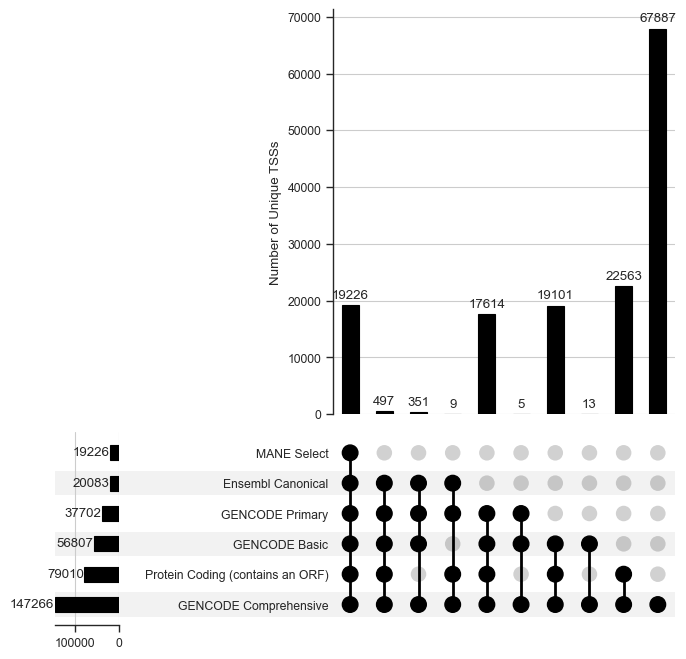

In [18]:
fig = plt.figure(figsize = (20,5))
upset_plot = plot(plot_df,fig=fig,intersection_plot_elements=12,sort_by = '-degree', show_counts=True)
upset_plot['intersections'].set_ylabel('Number of Unique TSSs')

gpp.savefig('../../Figures/Figure 6/transcript_sets_upsetplot.pdf', dpi=300, bbox_inches = 'tight')

### How many TSSs exist per gene?

In [21]:
protein_coding_df_melted = protein_coding_df_with_attributes.melt(id_vars = ['gene_name','gene_id','unique_tss_id'],
                                                                  value_vars = tags_renamed,
                                                                  var_name = 'transcript_flag').dropna()
protein_coding_df_melted = protein_coding_df_melted[protein_coding_df_melted['value']]
tss_per_gene = protein_coding_df_melted.groupby(['gene_name','gene_id','transcript_flag']).agg(num_tss = ('unique_tss_id','nunique')).reset_index()
tss_per_gene

,gene_name,gene_id,transcript_flag,num_tss
0,A1BG,ENSG00000121410.13,Ensembl Canonical,1
1,A1BG,ENSG00000121410.13,GENCODE Basic,2
2,A1BG,ENSG00000121410.13,GENCODE Comprehensive,5
3,A1BG,ENSG00000121410.13,GENCODE Primary,1
4,A1BG,ENSG00000121410.13,MANE Select,1
...,...,...,...,...
119286,ZZZ3,ENSG00000036549.13,GENCODE Basic,2
119287,ZZZ3,ENSG00000036549.13,GENCODE Comprehensive,10
119288,ZZZ3,ENSG00000036549.13,GENCODE Primary,2
119289,ZZZ3,ENSG00000036549.13,MANE Select,1


In [22]:
#bin tss counts according to create a ">10" bar on the histogram
bins = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float('inf')]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10', '>10']
tss_per_gene['num_tss_binned'] = pd.cut(tss_per_gene['num_tss'], bins=bins, labels=labels, right=True)

#drop categories with only 1 tss per gene by definition
plot_df = tss_per_gene[~tss_per_gene['transcript_flag'].isin(['Ensembl Canonical','MANE Select'])].copy()
plot_df = plot_df.rename(columns = {'transcript_flag':'Transcript Flag'})

plot_df

,gene_name,gene_id,Transcript Flag,num_tss,num_tss_binned
1,A1BG,ENSG00000121410.13,GENCODE Basic,2,2
2,A1BG,ENSG00000121410.13,GENCODE Comprehensive,5,5
3,A1BG,ENSG00000121410.13,GENCODE Primary,1,1
5,A1BG,ENSG00000121410.13,Protein Coding (contains an ORF),3,3
7,A1CF,ENSG00000148584.16,GENCODE Basic,3,3
...,...,...,...,...,...
119284,ZZEF1,ENSG00000074755.15,Protein Coding (contains an ORF),2,2
119286,ZZZ3,ENSG00000036549.13,GENCODE Basic,2,2
119287,ZZZ3,ENSG00000036549.13,GENCODE Comprehensive,10,10
119288,ZZZ3,ENSG00000036549.13,GENCODE Primary,2,2


In [23]:
plot_df.to_csv('../../Data/GENCODE48/tss_per_gene.csv',index=False)

In [22]:
#number of genes with exactly one tss belonging to each transcript set
plot_df[plot_df['num_tss'] == 1].groupby('Transcript Flag')['gene_id'].nunique()

Transcript Flag
GENCODE Basic                        6831
GENCODE Comprehensive                3125
GENCODE Primary                     10449
Protein Coding (contains an ORF)     4812
Name: gene_id, dtype: int64

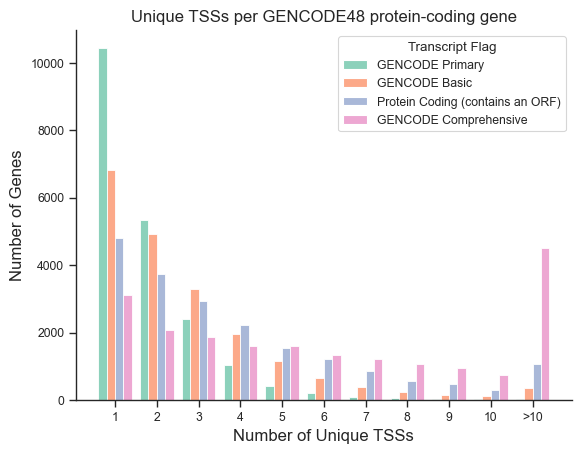

In [22]:
sns.histplot(data = plot_df, x = 'num_tss_binned', hue = 'Transcript Flag', multiple='dodge',shrink=0.8, discrete=True,
             hue_order = ['GENCODE Primary','GENCODE Basic','Protein Coding (contains an ORF)','GENCODE Comprehensive'])
plt.xlabel('Number of Unique TSSs',fontsize=12)
plt.ylabel('Number of Genes',fontsize=12)
plt.title('Unique TSSs per GENCODE48 protein-coding gene',fontsize=12)
sns.despine()

gpp.savefig('../../Figures/Figure 6/tss_per_gene_hist.pdf', dpi=300, bbox_inches = 'tight')

### How far apart are these TSSs?
To simplify answering this problem, we can look specifically at genes with only two TSSs.

In [32]:
protein_coding_df_melted = protein_coding_df_with_attributes.melt(id_vars = ['gene_id','unique_tss_id','TSS'],
                                                                  value_vars = tags_renamed,
                                                                  var_name = 'transcript_flag').dropna()
protein_coding_df_melted = protein_coding_df_melted[protein_coding_df_melted['value']]
#calculate number of TSSs per gene per transcript flag category
protein_coding_df_melted['num_tss'] = protein_coding_df_melted.groupby(['gene_id','transcript_flag'])['unique_tss_id'].transform('nunique')
#subset to genes with exactly 2 TSSs in a certain category
two_TSSs_only = protein_coding_df_melted[protein_coding_df_melted['num_tss'] == 2].copy().drop_duplicates()
#calculate distance between TSSs
plot_df = two_TSSs_only.groupby(['gene_id',
                                 'transcript_flag'])['TSS'].apply(lambda group: abs(group.diff().dropna())).reset_index()
plot_df = plot_df.rename(columns = {'TSS':'distance_between'})
plot_df

,gene_id,transcript_flag,level_2,distance_between
0,ENSG00000000003.16,GENCODE Basic,169179,298.0
1,ENSG00000000003.16,Protein Coding (contains an ORF),1028514,298.0
2,ENSG00000000005.6,GENCODE Comprehensive,856645,8688.0
3,ENSG00000000457.14,GENCODE Primary,183949,5008.0
4,ENSG00000001036.14,Protein Coding (contains an ORF),918801,9598.0
...,...,...,...,...
16091,ENSG00000293570.1,GENCODE Comprehensive,837614,4463.0
16092,ENSG00000293570.1,Protein Coding (contains an ORF),1009481,4463.0
16093,ENSG00000293600.2,GENCODE Basic,50218,382.0
16094,ENSG00000293600.2,GENCODE Comprehensive,737686,382.0


In [33]:
# Create custom bins
bins = list(range(0, 1001, 100))  # Up to 1000 in steps of 100
bins.append(float('inf'))  # Everything larger than 1000

# Create bin labels
labels = [f'[{bins[i]}, {bins[i+1]})' for i in range(len(bins) - 1)]
labels[-1] = f'[{bins[-2]}, inf)'  # Handle the last bin

# Bin the 'difference' column
plot_df['tss_distance_bin'] = pd.cut(plot_df['distance_between'], bins=bins, labels=labels, right=False, include_lowest=True)
histplot_df = plot_df.groupby(['transcript_flag','tss_distance_bin'])['gene_id'].nunique().reset_index()
histplot_df

,transcript_flag,tss_distance_bin,gene_id
0,GENCODE Basic,"[0, 100)",2608
1,GENCODE Basic,"[100, 200)",330
2,GENCODE Basic,"[200, 300)",234
3,GENCODE Basic,"[300, 400)",159
4,GENCODE Basic,"[400, 500)",106
5,GENCODE Basic,"[500, 600)",89
6,GENCODE Basic,"[600, 700)",66
7,GENCODE Basic,"[700, 800)",50
8,GENCODE Basic,"[800, 900)",44
9,GENCODE Basic,"[900, 1000)",33


In [34]:
histplot_df['Transcript Flag'] = histplot_df['transcript_flag']

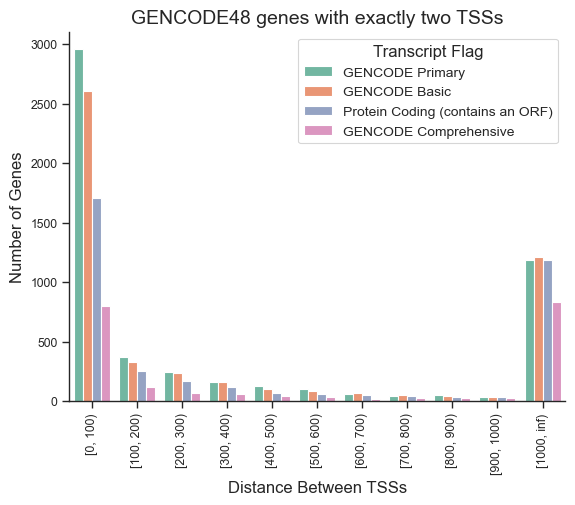

In [36]:
sns.barplot(data = histplot_df, x = 'tss_distance_bin', y = 'gene_id', hue = 'Transcript Flag',
            hue_order = ['GENCODE Primary','GENCODE Basic','Protein Coding (contains an ORF)','GENCODE Comprehensive'])

plt.xlabel('Distance Between TSSs',fontsize=12)
plt.ylabel('Number of Genes',fontsize=12)
plt.title('GENCODE48 genes with exactly two TSSs',fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Transcript Flag',fontsize=10,title_fontsize=12)
sns.despine()

gpp.savefig('../../Figures/Figure 6/tss_dist_genes_with_exactly_two_tsss_hist.pdf', dpi=300, bbox_inches = 'tight')